<h1><b>Ο Αλγόριθμος <i>Metropolis-Hastings</i></b></h1>

<b>Σημείωση</b>: Η άσκηση αυτή έχει βασιστεί στο άρθρο που μπορεί να βρεθεί <a href="https://www.tweag.io/blog/2019-10-25-mcmc-intro1/">εδώ</a>. Στο συγκεκριμένο άρθρο μπορεί να βρεθεί μια πιο αναλυτική εισαγωγή στις μεθόδους <b><i>Monte Carlo Markov Chain</i> (<i>MCMC</i>)</b> και στον αλγόριθμο <b><i>Metropolis-Hastings</i></b>, καθώς και συνοδευτικά άρθρα για πιο προχωρημένα ζητήματα.

\\

Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <b><i>Metropolis-Hastings</i></b>. Συγκεκριμένα, θα χρησιμοποιήσετε τον αλγόριθμο για να λάβετε δειγματικά στοιχεία (sampling points) από μία <b><i>τυπική κανονική κατανομή</i> (<i>standard normal distribution</i>)</b>, δηλαδή μία κανονική κατανομή συνεχούς τυχαίας μεταβλητής με μέση τιμή $μ=0$ και τυπική απόκλιση $σ=1$.

Ως <b><i>proposal conditional density</i></b> θα λάβετε μία ομοιόμορφη κατανομή στο διάστημα $(-\frac{Δ}{2}, \frac{Δ}{2})$. Αφού η <b><i>proposal conditional density</i></b> που θα χρησιμοποιήσετε είναι μία συμμετρική κατανομή, ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα λάβει την απλοποιημένη μορφή του, δηλαδή η πιθανότητα να πραγματοποιήσετε μία μετάβαση από την κατάσταση $x_{old}$ στην κατάσταση $x_{new}$ για μια κατανομή $π$ θα δίνεται από τον παρακάτω τύπο:

$$
p_{accept}(x_{new} | x_{old}) = min\left[1, \frac{π(x_{new})}{π(x_{old})}\right]
$$

Αναλυτικές οδηγίες σχετικά με το πώς προκύπτει ο παραπάνω τύπος περιλαμβάνονται στις διαφάνειες του μαθήματος, αλλά και στο άρθρο πάνω στο οποίο βασίστηκε η συγκεκριμένη άσκηση.

<h3><b>Υλοποίηση του Αλγορίθμου <i>Metropolis-Hastings</i> σε Python</b></h3>

Αρχικά, θα ορίσουμε τη μέθοδο <b><i>log_prob</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την <b><i>τυπική κανονική κατανομή</i></b>. Να σημειωθεί ότι λαμβάνεται ο λογάριθμος της κατανομής αυτής. Ο λογάριθμος αυτός μπορεί να υπολογιστεί εύκολα από τον τύπο της <b><i>τυπικής κανονικής κατανομής</i></b>, που είναι διαθέσιμος από <a href="https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution">εδώ</a>. Λόγοι για τους οποίους προτιμάται αυτή η μορφή μπορούν να αναζητηθούν <a href="https://stats.stackexchange.com/questions/137710/metropolis-hastings-using-log-of-the-density">εδώ</a>. Τέλος, οι σταθερές μπορούν να αγνοηθούν από τον τύπο με ασφάλεια λόγω της μορφή του αλγορίθμου <b><i>Metropolis-Hastings</i></b>.

In [1]:
def log_prob(x):
     return -0.5 * np.float64(x ** 2)

Στη συνέχεια, ορίζουμε τη μέθοδο <b><i>proposal</i></b>, η οποία θα χρησιμοποιηθεί για τον υπολογισμό τιμών από την ομοιόμορφη κατανομή, η οποία αποτελεί την <b><i>proposal conditional density</i></b>.

In [2]:
def proposal(x, stepsize):
    return np.random.uniform(low=x - 0.5 * stepsize,
                             high=x + 0.5 * stepsize,
                             size=x.shape)

Η πιθανότητα αποδοχής μιας νέας κατάστασης $x_{new}$ δεδομένης της τρέχουσας κατάστασης $x_{old}$ υπολογίζεται από τη παρακάτω μέθοδο. Να σημειωθεί πως στη συγκεκριμένη μέθοδο, ο τύπος $p_{accept}$ που δόθηκε παραπάνω έχει τροποποιηθεί κατάλληλα, ώστε να μην εμφανίζονται αρνητικές τιμές. Οι δύο μορφές του τύπου είναι ισοδύναμες, καθώς σημασία έχει η σύγκριση δύο τιμών και όχι οι ακριβείς τιμές, όπως φαίνεται από τον παραπάνω τύπο.

In [3]:
def p_acc_MH(x_new, x_old, log_prob):
    return min(1, np.exp(log_prob(x_new) - log_prob(x_old)))

Στη συνέχεια, υλοποιείται η μέθοδος με την οποία θα αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα.

In [4]:
import numpy as np
def sample_MH(x_old, log_prob, stepsize):
    x_new = proposal(x_old, stepsize)
    accept = np.random.random() < p_acc_MH(x_new, x_old, log_prob)
    if accept:
        return accept, x_new
    else:
        return accept, x_old

Τέλος, ορίζεται μία συνάρτηση που μετράει πόσες φορές έγιναν αποδεκτά τα προτεινόμενα βήματα.

In [5]:
def build_MH_chain(init, stepsize, n_total, log_prob):

    n_accepted = 0
    chain = [init]

    for _ in range(n_total):
        accept, state = sample_MH(chain[-1], log_prob, stepsize)
        chain.append(state)
        n_accepted += accept

    acceptance_rate = n_accepted / float(n_total)

    return chain, acceptance_rate

<h3><b>Ερωτήματα (Μέρος Α)</b></h3>

<ul>
<li>Με ποιον τρόπο αποφασίζει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> εάν θα γίνει δεκτό ένα προτεινόμενο βήμα; Να εξηγήσετε συνοπτικά βάσει των παραπάνω μεθόδων.</li>
<li>Με ποιον τρόπο αξιοποιούνται οι <b><i>αλυσίδες Markov</i> (<i>Markov Chains</i>)</b> από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> για τη λήψη τυχαίων δειγματικών σημείων από μία κατανομή πιθανοτήτων;</li>
<li>Ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> χρησιμοποιείται για τη λήψη τυχαίου δείγματος από μία κατανομή πιθανοτήτων για την οποία είναι αδύνατο να λάβουμε τέτοια δειγματικά στοιχεία λόγω αδυναμίας πλήρους καταγραφής του δειγματικού χώρου ή/και υπολογισμού κάποιας <b><i>σταθεράς κανονικοποίησης</i></b> που εμφανίζεται στην κατανομή. Έτσι, λαμβάνεται ως <b><i>κατανομή στόχος</i></b> μία κατανομή που έχει γνωστή μορφή, ανάλογη με την κατανομή από την οποία θέλουμε να λάβουμε τα δειγματικά στοιχεία. Με ποιον τρόπο καταφέρνει ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> να δώσει αποτελέσματα παρά το γεγονός ότι αγνοεί τη <b><i>σταθερά κανονικοποίησης</i></b>;
</ul>

ΑΠΑΝΤΗΣΕΙΣ:

ii) Η κύρια λειτουργία που επιτελεί ο αλγόριθμος Metropolis-Hastings είναι ότι παρέχει μία μέθοδο για δειγματοποίηση  από αυθαίρετη πιθανοτική κατανομή, το οποίο δηλώνεται με p(x).H ιδέα είνα ότι ορίζουμε μια αλυσίδα Markov με πιθανές τιμές του x, με έναν τέτοιο τρόπο ώστε η στατική κατανομή από την αλυσίδα Markov να είναι στην πραγματικότητα η p(x).
Συγκεκριμένα, χρησιμοποιούμε τη Markov chain για να παράξουμε μία ακολουθία από τιμές του Χ (Χ0,Χ1,Χ2,...,Χn), με έναν τέτοιον τρόπο ώστε καθώς n->00, να μπορούμε να εγγυηθούμε ότι Xn~p(x).

Proposal Step

Υποθέτουμε ότι η τωρίνη κατάσταση της Markov Chain είναι Xn και θέλουμε να παράξουμε Xn+1. Στον αλγόριθμο Metropolis-Hastings η δημιουργία του Xn+1 είναι μία διαδικασία 2 σταδίων.
Το 1ο στάδιο είναι να δημιουργήσουμε έναν υποψήφιο (candidate) X*. Η τιμή X* παράγεται από τη κατανομή που ξέρουμε ήδη πως να τη δειγματοποιήσουμε.Δηλώνουμε τη προτεινόμενη κατανομή q(x*|Xn). Παρατηρούμε ότι η κατανομή από την οποία δειγματοποιούμε εξαρτάται από την υπάρχουσα κατάσταση της Markov Chain. Συνεπώς, χρησιμοποιούμε μια κανονική κατανομή με κέντρο την τωρινή κατάσταση Xn. Δηλαδή: X*|Xn ~ Normal(Xn,σ^2), με σ -> τυπική απόκλιση.

The accept-reject step

Το 2ο στάδιο είναι η αποδοχή ή απόρριψη . Αρχικά, χρειάζεται να υπολογίσουμε τη πιθανότητα αποδοχής (acceptance probability), που δηλώνεται A(Xn->X*), το οποίο δίνεται από τον τύπο:
A(Xn->X*)=min(1,(p(X*)/p(x^n))x(q(Xn|X*)/q(X*|Xn)))

iii)Παρατηρούμε, ότι η τιμή p(x*)/p(X^n) δεν εξαρτάται από τη κανονικοποίηση της σταθεράς για τη κατανομή. Δηλαδή αγνοούμε τη σταθερά της κανονικοποίησης.

p(x*)/p(x^n)=exp(-X^2)(2+sin(5x*)+sin(2x*))/exp(-X^2)(2+sin(5Xn)+sin(2xn))


To 2o πράγμα που πρέπει να προσέξουμε είναι η συμπεριφορά του άλλου όρου, q(Xn|X*)/q(X*|Xn). Αυτό που κάνει αυτός όρος είναι να διορθώνει τις μεροληψίες που προκύπτουν από τη κατανομή.Σε αυτή την έκφραση , ο παρανομαστής q(X*|Xn) περιγράφει τη πιθανότητα με την οποία επιλέγουμε Χ* ως υποψήφιο με δεδομένο ότι η υπάρχον κατάσταση της Markov Chain είναι Xn. Ο αριθμητής περιγράφει τη πιθανότητα μετάβασης με άλλον τρόπο.


i)Τέλος, έχοντας προτείνει το X* ως candidate και έχοντας υπολογίσει τη πιθανότητα αποδοχής (acceptance probability) A(Xn->X*) ,τώρα αποφασίζουμε αν θα κάνουμε accept τον candidate X* και θα ορίζουμε Xn+1=X* ή αν θα κάνουμε reject τον candidate και θα θέσουμε Xn+1=X*. Για να πάρουμε αυτή την απόφαση παράγουμε μια ομοιόμορφη κατανομή τυχαίων αριθμών ανάμεσα στο 0 και το 1 και τα δηλώνουμε ως u.
Τότε:

Xn+1=X*, αν u<=A(Xn->X*)

ή

Xn+1=Xn, αν u>=A(Xn->X*)

<h3><b>Δοκιμές του Αλγορίθμου <i>Metropolis-Hastings</i></b></h3>

Το παρακάτω τμήμα κώδικα ασχολείται με την κλήση των παραπάνω μεθόδων και την οπτικοποίηση των αποτελεσμάτων.

In [6]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]
np.random.seed(42)

def plot_samples(chain, log_prob, ax, orientation='vertical', normalize=True,
                 xlims=(-5, 5), legend=True):
    from scipy.integrate import quad

    ax.hist(chain, bins=50, density=True, label="MCMC samples",
           orientation=orientation)
    # we numerically calculate the normalization constant of our PDF
    if normalize:
        Z, _ = quad(lambda x: np.exp(log_prob(x)), -np.inf, np.inf)
    else:
        Z = 1.0
    xses = np.linspace(xlims[0], xlims[1], 1000)
    yses = [np.exp(log_prob(x)) / Z for x in xses]
    if orientation == 'horizontal':
        (yses, xses) = (xses, yses)
    ax.plot(xses, yses, label="true distribution")
    if legend:
        ax.legend(frameon=False)

def sample_and_display(init_state, stepsize, n_total, n_burnin, log_prob):
    chain, acceptance_rate = build_MH_chain(init_state, stepsize, n_total, log_prob)
    print("Acceptance rate: {:.3f}".format(acceptance_rate))
    fig, ax = plt.subplots()
    plot_samples([state for state, in chain[n_burnin:]], log_prob, ax)
    ax.set_yticks(())
    plt.show()

Το αποτέλεσμα που περιμένετε να δείτε από τη συγκεκριμένη άσκηση είναι ότι ο αλγόριθμος <b><i>Metropolis-Hastings</i></b> θα σας επιστρέψει δειγματικά στοιχεία τα οποία θα ακολουθούν <b><i>τυπική κανονική κατανομή</i></b>.

Εκτελέστε την παρακάτω μέθοδο για μέγεθος βήματος $Δ = 3.0$ και συνολικό αριθμό βημάτων $10000$. Παρατηρήστε ότι η κατανομή που προκύπτει είναι πολύ κοντά σε μία <b><i>τυπική κανονική</i></b>, ενώ το ποσοστό των βημάτων που έγιναν δεκτά από τον αλγόριθμο <b><i>Metropolis-Hastings</i></b> είναι περίπου $70$%.

<ipython-input-1-b71c5e6bb5a3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -0.5 * np.float64(x ** 2)


Acceptance rate: 0.718


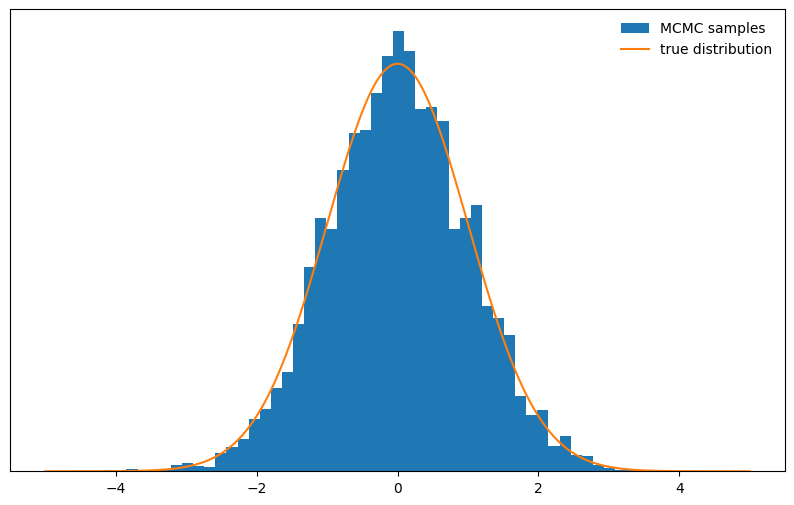

CPU times: user 1.02 s, sys: 282 ms, total: 1.3 s
Wall time: 1.31 s


In [7]:
%%time
sample_and_display(np.array([2.0]), 3.0, 10000, 500, log_prob)

<h3><b>Ερωτήματα (Μέρος Β)</b></h3>

Να επαναλάβετε για $Δ=30$ και συνολικό αριθμό βημάτων $10000$. Τι παρατηρείτε ότι συμβαίνει στην περίπτωση που χρησιμοποιείτε ένα πολύ μεγάλο βήμα, δηλαδή πολύ μεγάλη τιμή για την παράμετρο $Δ$; Να επαναλάβετε για $Δ=300$, $Δ=3000$ και $Δ=30000$, ώστε να επιβεβαιώσετε το συμπέρασμά σας. Σχολιάστε και το ποσοστό των αποδεκτών βημάτων.

<ipython-input-1-b71c5e6bb5a3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -0.5 * np.float64(x ** 2)


Acceptance rate: 0.109


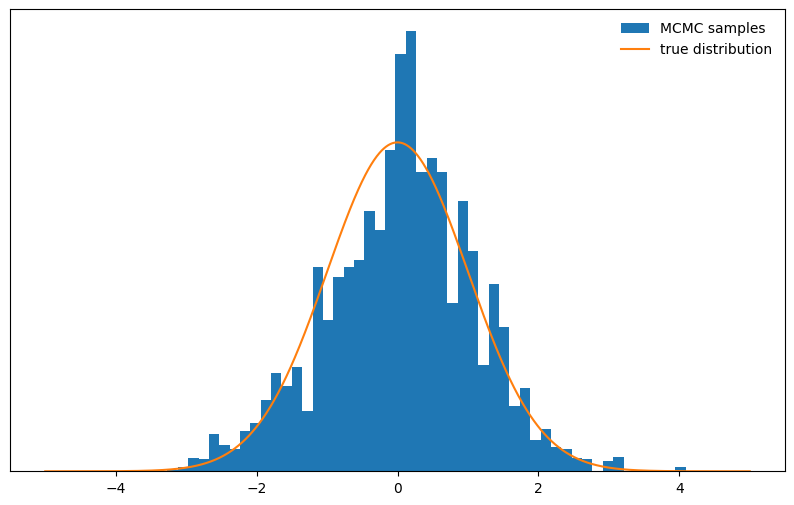

Acceptance rate: 0.010


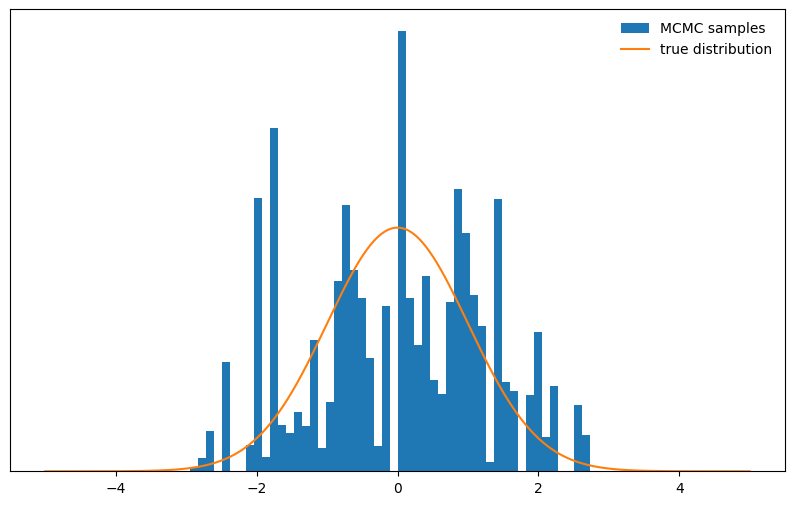

Acceptance rate: 0.001


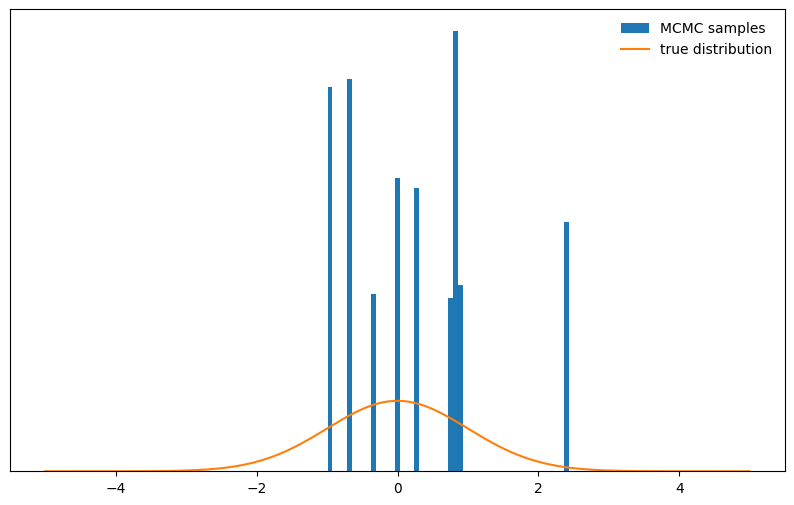

Acceptance rate: 0.000


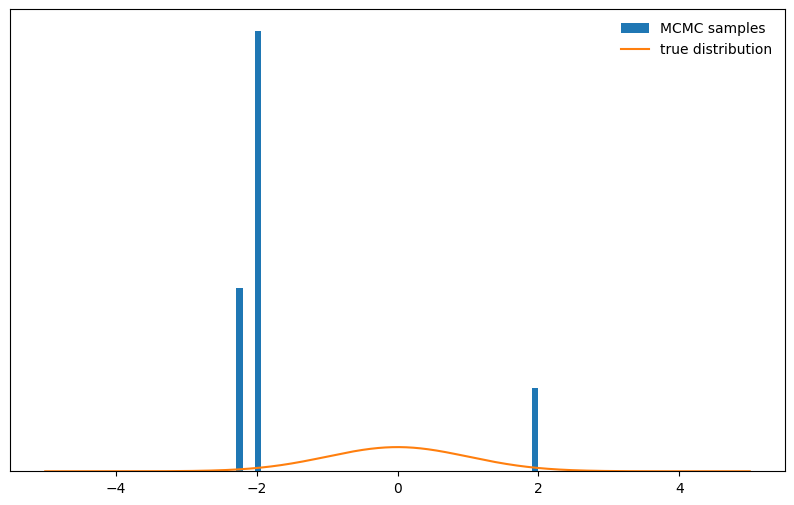

CPU times: user 2.6 s, sys: 361 ms, total: 2.96 s
Wall time: 3.42 s


In [10]:
%%time
sample_and_display(np.array([2.0]), 30, 10000, 500, log_prob)
sample_and_display(np.array([2.0]), 300, 10000, 500, log_prob)
sample_and_display(np.array([2.0]), 3000, 10000, 500, log_prob)
sample_and_display(np.array([2.0]), 30000, 10000, 500, log_prob)

ΑΠΑΝΤΗΣΗ:

Γίνεται εμφανές πως η αύξηση του βήματος, οδηγεί σε μια λιγότερο ικανοποιητική προσέγγιση της κατανομής. Το acceptance rate μειώνεται σημαντικά.Συγκεκριμένα, από 0.104 που είναι στο βήμα 30, γίνεται: 0.011 στο βήμα 300, 0.001 στο βήμα 3000 και 0.000 στο βήμα 30000.Η μεταβολή αυτή των τιμών, έχει αντίκτυπο και στις καμπύλες. Όσο το βήμα αυξάνεται, χάνεται ολόνεα και περισσότερο η ομοιόμορφη κατανομή των δεδομένων.
Ο λόγος για τον οποίο η αύξηση των βημάτων οδηγεί σε σημαντικές αποκλίσεις από την κατανομή-στόχο είναι πως η αύξηση του ταυτίζεται με τη διεύρυνση του διαστήματος από το οποίο πραγματοποιείται η δειγματοληψία σε κάθε βήμα. Έτσι, η πιθανότητα ένα δείγμα να λαμβάνεται σε περιοχή όπου η πυκνότητα της κατανομής-στόχου είναι πρακτικά μηδενική αυξάνεται επίσης σημαντικά.


Να επαναλάβετε για $Δ=0.1$, δηλαδή μία πολύ μικρή τιμή για το βήμα. Τι παρατηρείτε; Είναι ικανοποιητικά τα αποτελέσματά σας; Σχολιάστε και το ποσοστό των αποδεκτών βημάτων. Να επαναλάβετε για $Δ=0.01$.

<ipython-input-1-b71c5e6bb5a3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -0.5 * np.float64(x ** 2)


Acceptance rate: 0.991


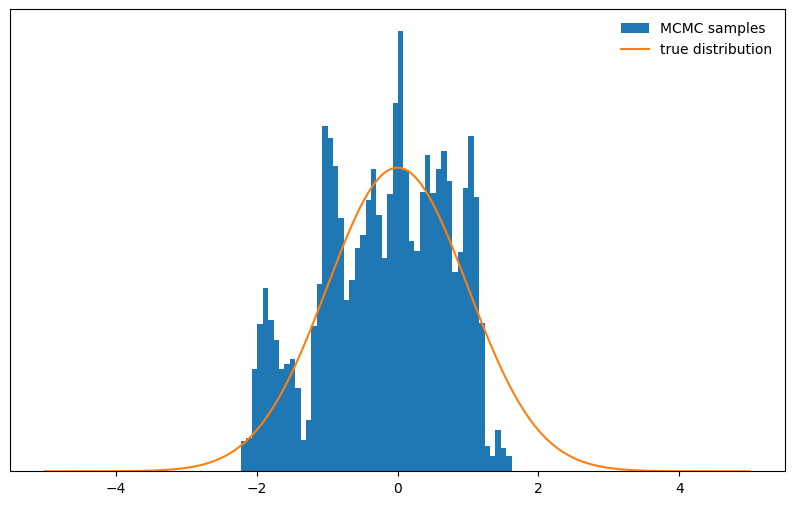

Acceptance rate: 0.997


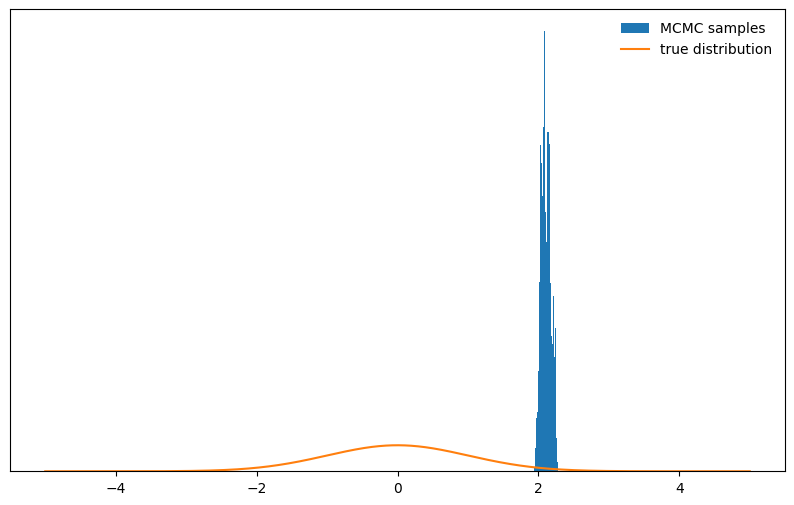

CPU times: user 1.48 s, sys: 192 ms, total: 1.67 s
Wall time: 1.88 s


In [11]:
%%time
sample_and_display(np.array([2.0]), 0.1, 10000, 500, log_prob)
sample_and_display(np.array([2.0]), 0.01, 10000, 500, log_prob)

ΑΠΑΝΤΗΣΗ:

Η μείωση της τιμής του Δ, έχει ως αποτέλεσμα να αυξηθεί σημαντικά η τιμή του acceptance rate. Συγκεκριμένα, για Δ=0.1 το acceptance rate είναι 0.991 , ενώ για Δ=0.01 το acceptance rate ισούται με 0.997.

Η προσέγγιση της κατανομής-στόχου παραμένει μη ικανοποιητική, αφού δεν απορρίπτονται αρκετά δείγματα προκειμένου να είναι σαφές το ποια δείγματα αντιστοιχούν πραγματικά στην κατανομή-στόχο. Όπως φάνηκε παραπάνω, ο μόνος τρόπος να διορθωθεί κάπως το τελικό αποτέλεσμα για «ακατάλληλες» του Δ, θα ήταν η αύξηση του πλήθους των συνολικών βημάτων.

Να επαναλάβετε αυξάνοντας το συνολικό αριθμό βημάτων που θα πραγματοποιηθούν σε $500000$. Τι παρατηρείτε σχετικά με την ακρίβεια των αποτελεσμάτων σας, αλλά και το χρόνο εκτέλεσης του αλγορίθμου <b><i>Metropolis-Hastings</i></b>;

<ipython-input-1-b71c5e6bb5a3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -0.5 * np.float64(x ** 2)


Acceptance rate: 0.990


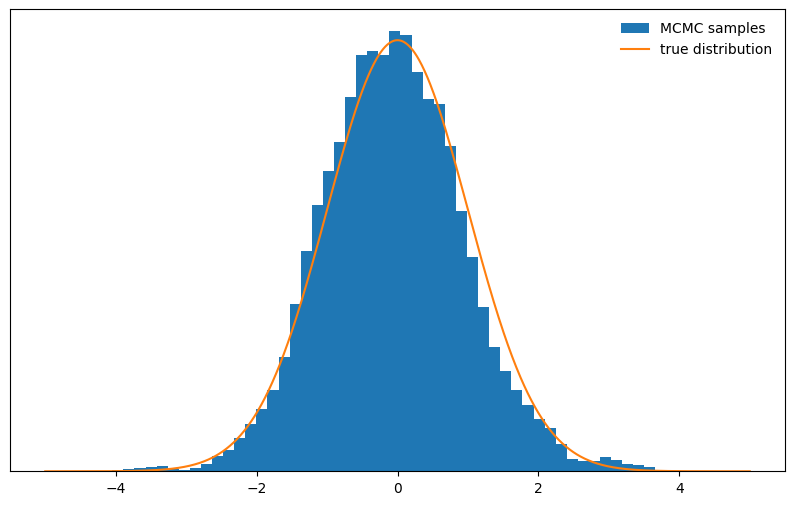

CPU times: user 17.3 s, sys: 1.31 s, total: 18.6 s
Wall time: 19.2 s


In [12]:
%%time
sample_and_display(np.array([2.0]), 0.1, 500000, 25000, log_prob)

ΑΠΑΝΤΗΣΗ:

Η αύξηση των βημάτων βελτιώνει αρκετά την προσέγγιση στην κατανομή-στόχο, ενώ διατηρεί το acceptance rate σε  ίδιες τιμές, όπως και στην περίπτωση που Δ>=30.
Επίσης, βλέπουμε ότι ο χρόνος εκτέλεσης της εντολής είναι μεγαλύτερος από κάθε άλλη φορα.

Η συνάρτηση <b><i>sample_and_display</i></b> περιλαμβάνει το n_burnin ως τέταρτο όρισμα. Ποια είναι η χρησιμότητα του ορίσματος αυτού; Δοκιμάστε τις παρακάτω τιμές:
<ul>
<li>$Δ=0.1$, αριθμός βημάτων $1000$ και n_burnin=$10$.</li>
<li>$Δ=0.1$, αριθμός βημάτων $500000$ και n_burnin=$490000$.</li>
</ul>
Τι παρατηρείτε;

<ipython-input-1-b71c5e6bb5a3>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return -0.5 * np.float64(x ** 2)


Acceptance rate: 0.984


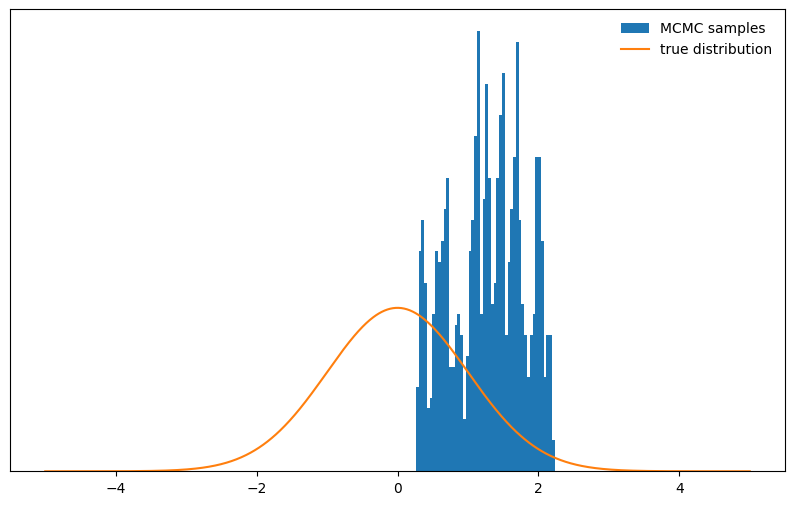

Acceptance rate: 0.991


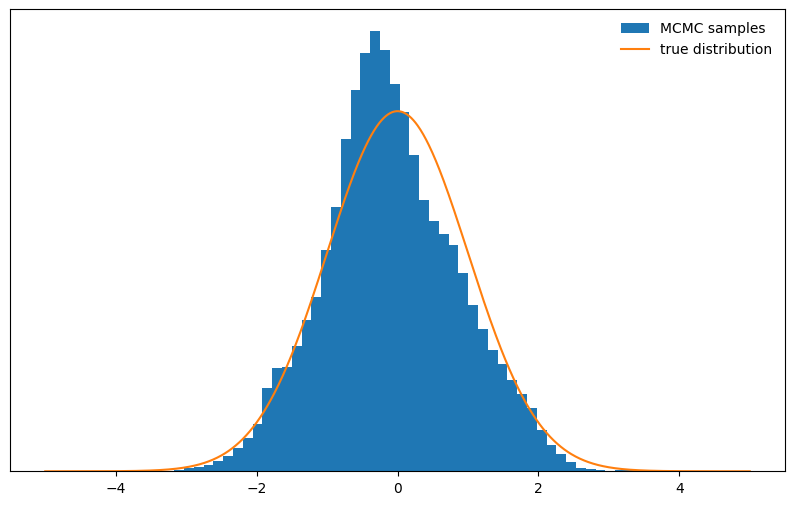

CPU times: user 16.3 s, sys: 1.19 s, total: 17.5 s
Wall time: 16.9 s


In [13]:
%%time
sample_and_display(np.array([2.0]), 0.1, 1000, 10, log_prob)
sample_and_display(np.array([2.0]), 0.1, 500000, 49000, log_prob)

ΑΠΑΝΤΗΣΗ:

Το όρισμα n_burnin χρησιμοποιείται για να προσδιορίσει πόσα δείγματα θα πρέπει να αγνοηθούν από την αρχή του αλγορίθμου, προτού ξεκινήσει η απόκτηση αντιπροσωπευτικών δειγμάτων από την ισορροπημένη κατανομή. Αυτό μπορεί να βοηθήσει στην αποφυγή της επίδρασης της αρχικής θέσης της αλυσίδας στην τελική κατανομή των δειγμάτων που παράγονται από τον αλγόριθμο.

Από την παραπάνω εκτέλεση των 2 εντολών βγάζουμε τα εξής συμπεράσματα:

Στην πρώτη περίπτωση, από το τελικό αποτέλεσμα αφαιρούνται μόνο τα πρώτα 10 δείγματα.Το δείγμα όμως είναι μικρό και δεν μπορεί να οδηγήσει σε ασφαλή συμπεράσματα.

Στη δεύτερη περίπτωση, από το τελικό αποτέλεσμα αφαιρείται το 98% των δειγμάτων, με αποτέλεσμα η αρχική κατάσταση να έχει όντως ξεχαστεί, όμως το υπόλοιπο των βημάτων μετά την burn-in περίοδο να μην επαρκεί για να αντικατοπτρίσει την κατανομή-στόχο.